<div style="text-align: center;">
  <h1>TA145 - Redes Neuronales y Aprendizaje Profundo</h1>
  <h2>Trabajo Práctico 1: Red de Hopfield</h2>
</div>

---
---

<div style="text-align: left;">
  <h3><b>Introducción</b></h3>
</div>

---
---

<div style="text-align: left;">
  <h3><b>Base teórica</b></h3>
</div>

<div style="text-align: left;">
  <h4><b>Fundamentos del modelo de Hopfield</b></h4>
</div>

&ensp; Las redes de Hopfield son un tipo de red neuronal recurrente propuesta por John Hopfield en $1982$. Se caracterizan por ser modelos de memoria asociativa, es decir, pueden almacenar patrones y recuperarlos incluso cuando la entrada está incompleta o con ruido. Estas redes presentan una estructura totalmente conectada y simétrica, en la cual cada neurona se conecta con todas las demás, pero no consigo misma. Cada neurona $S_i$ puede tomar valores binarios ($+1$ o $-1$), lo que permite representar estados discretos de activación. 

&ensp; La Figura 1 muestra un esquema de esta arquitectura, donde cada nodo representa una neurona y las conexiones ilustran los pesos sinápticos que conforman la memoria distribuida de la red.

<center>

<figure> <img src="ReportImages/HopfieldNetworks.png" alt="Estructura de una red de Hopfield" width="300"> <figcaption><i>Figura 1.</i> Estructura de una red de Hopfield totalmente conectada.</figcaption> </figure>

</center>


&ensp;

<div style="text-align: left;">
  <h4><b>Regla de Hebb</b></h4>
</div>

&ensp; El aprendizaje de los patrones se logra mediante la regla de Hebb, que refuerza las conexiones entre neuronas que se activan de manera conjunta. La matriz de pesos sinápticos $w_{ij}$ se define como:

$$ w_{ij} = \frac{1}{N} ~ \sum_{\mu=0}^{P} \xi_i^\mu \cdot \xi_j^\mu, \quad w_{ii} = 0$$

donde $N$ el número total de neuronas, $P$ la cantidad de patrones a almacenar y $\xi_{i, ~ j}^\mu$ el valor del bit $i$ o $j$ dentro del patrón $\mu$.

&ensp;

<div style="text-align: left;">
  <h4><b>Dinámica y actualización de estados</b></h4>
</div>

&ensp; Una vez entrenada la red, el siguiente paso consiste en presentarle un patrón de entrada (completo, parcial o con ruido) y dejar que evolucione dinámicamente hasta converger a uno de los patrones previamente almacenados. Esta evolución se describe mediante la regla de actualización:

$$S_i = \text{sgn} \left( \sum_{j=1}^{N} w_{ij} S_j \right)$$

&ensp; La actualización de los estados puede realizarse de dos maneras:

- **Actualización sincrónica:** todas las neuronas actualizan su estado en paralelo en cada paso de tiempo. Esto es más simple de implementar y analizar, pero puede generar oscilaciones o estados cíclicos que no siempre corresponden a mínimos de energía.

- **Actualización asincrónica:** las neuronas se actualizan una por vez, de manera secuencial o aleatoria. En este caso, se garantiza que la función de energía decrece en cada actualización, lo que asegura la convergencia hacia un estado estable.

&ensp;

<div style="text-align: left;">
  <h4><b>Función de energía</b></h4>
</div>

&ensp; La energía es una función matemática que describe el estado global de la red. La dinámica de la red está diseñada para evolucionar hacia un estado estable, el cual corresponde a un mínimo de la función de energía $H$. Esta se define como:

$$H = -\frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} w_{ij} S_i S_j$$

La red actualiza sus estados de manera que la energía $H$ nunca aumenta, garantizando la convergencia hacia un mínimo. Dichos mínimos representan los patrones previamente almacenados, lo que permite corregir errores en entradas ruidosas e incluso reconstruir información faltante, funcionando como un sistema de memoria asociativa robusto.

<center>
<figure> <img src="ReportImages/EnergyFunction.png" alt="Función de energía en la red de Hopfield" width="600"> <figcaption><b>Figura 2.</b> Representación de la función de energía en una red de Hopfield.</figcaption> </figure>
</center>

&ensp;

<div style="text-align: left;">
  <h4><b>Estados espurios</b></h4>
</div>

&ensp; Además de los patrones almacenados correctamente mediante la regla de Hebb, pueden aparecer estados espurios. Estos corresponden a mínimos locales de la función de energía que no coinciden con ningún patrón de entrenamiento.

&ensp; Los principales tipos de estados espurios son:

- **Patrones invertidos:** el patrón almacenado y su inverso son igualmente estables.

$$ S_{\text{inv}} = -\boldsymbol{\xi} $$

- **Combinaciones de patrones:** la red puede converger hacia un estado que es una mezcla de un número impar de patrones.

$$S_{\text{mix}} = \text{sgn}\left(\sum_{\mu=1}^{2k+1} \boldsymbol{\xi}^{\mu}\right)$$

- **Spin glass:** son mínimos locales que no se parecen a ningún patrón almacenado.

&ensp;

<div style="text-align: left;">
  <h4><b>Capacidad de memoria</b></h4>
</div>

&ensp; Una cuestión fundamental en las redes de Hopfield es su capacidad de almacenamiento. Como cada patrón se codifica como un mínimo local de la función de energía, existe un límite máximo de patrones que la red puede guardar sin que aparezcan errores significativos en la recuperación.  

&ensp; La causa de estas limitaciones es la interferencia de los demás patrones almacenados durante el proceso de actualización, concepto conocido como *crosstalk*. Para la neurona $i$ en el patrón $\nu$, este término se expresa como:  

$$ C_i^\nu = -\xi_i^\nu \,\frac{1}{N} \sum_{j} \sum_{\mu \neq \nu} \xi_i^\mu \xi_j^\mu \xi_j^\nu $$

> Si $C_i^\nu$ es pequeño o negativo, no altera el valor correcto de la neurona. En cambio, si $C_i^\nu > 1$, la señal de la neurona se invierte y el patrón $\nu$ se vuelve inestable.  

&ensp; Considerando patrones idénticamente distribuidos e independientes, los valores de $C_i^\nu$ pueden aproximarse mediante el teorema central del límite a una variable gaussiana de media cero y varianza $\sigma^2 = \frac{p}{N}$. Así, según lo mencionado con antelación, la probabilidad de error corresponde a:  

$$ P_{\text{error}} = \mathbb{P}(C_i^\nu > 1) \Longrightarrow \alpha = \frac{p_{\text{max}}}{N}$$

donde $\alpha$ es la carga crítica de la red y se obtiene evaluando la probabilidad sobre la distribución gaussiana y despejando para $\frac{p}{N}$. Esta indica cuántos patrones por neurona pueden almacenarse sin superar un nivel de error dado y da lugar a la tabla que se visualiza a continuación.

<center>

| $P_{\text{error}}$ | $\frac{p_{\text{max}}}{N}$ |
|--------|--------|
| 0,001  | 0,105  |
| 0,0036 | 0,138  |
| 0,01   | 0,185  |
| 0,05   | 0,37   |
| 0,1    | 0,61   |

<b>Tabla 1.</b> Valores de la carga crítica en función de la probabilidad de error.

</center>

&ensp;

<div style="text-align: left;">
  <h4><b>Patrones correlacionados y limitaciones prácticas</b></h4>
</div>

&ensp; El análisis anterior se basa en el supuesto de que los patrones almacenados son independientes y no presentan correlaciones. No obstante, en aplicaciones reales esta condición rara vez se cumple, ya que, los datos suelen compartir similitudes estructurales.

&ensp; Bajo estas circunstancias, los vectores de memoria dejan de ser ortogonales y la matriz de pesos tiene una mayor superposición entre patrones. Como consecuencia, el término de *crosstalk* se intensifica, dificultando la diferenciación correcta entre estados almacenados. Esto reduce la capacidad efectiva de la red y aumenta la probabilidad de errores de recuperación, así como la aparición de estados espurios.

---
---

<div style="text-align: left;">
  <h3><b>Desarrollo</b></h3>
</div>

<div style="text-align: left;">
  <h4><b>Ejercicio 1</b></h4>
</div>

**Entrene una red de Hopfield ‘82 con las imágenes binarias disponibles en el campus.**

&ensp; En primer lugar, se importan las librerías necesarias para el desarrollo del código implementado. Además, se definen las rutas relativas hacia las carpetas que contienen las imágenes de tamaños $50 \times 50$ y $60 \times 45$, que serán utilizadas a lo largo del trabajo.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from PIL import Image
import os

path_50x50 = 'Images/50x50/'
path_60x45 = 'Images/60x45/'

&ensp; Luego, se realizan funciones para cargar y visualizar imágenes. La función $\texttt{load\_images}$ permite leer todas las imágenes de una carpeta y convertirlas en una lista de *arrays*, con la opción de redimensionarlas si se desea. Por otro lado, $\texttt{plot\_images}$ facilita la visualización de una lista de imágenes en una sola fila, mostrando cada imagen en escala de grises y sin ejes.

In [3]:
def load_images(folder_path, resize=None) -> list[np.ndarray]:
    """
    Loads BMP images from a specified folder and returns them as a list of numpy arrays.
    """
    if folder_path is None or not os.path.isdir(folder_path):
        raise ValueError("Invalid folder path.")
    
    images = []
    for image_name in os.listdir(folder_path):
        if image_name.lower().endswith('.bmp'):
            image_path = os.path.join(folder_path, image_name)
            with Image.open(image_path) as img:
                if resize:
                    img = img.resize(resize)
                images.append(np.array(img))
    
    return images

def plot_images(images) -> None:
    """
    Plots a list of images in a single row.
    """
    if (len(images) == 0):
        raise ValueError("No images to display.")

    elif (len(images) == 1):
        plt.figure(figsize=(3.5, 5))
        plt.imshow(images[0], cmap='gray')
        plt.axis('off')

    else:
        fig, axes = plt.subplots(1, len(images), figsize=(10, 5))
        for i, ax in enumerate(axes):
            ax.imshow(images[i], cmap='gray')
            ax.axis('off')
    plt.tight_layout()
    plt.show()

&ensp; A continuación, se cargan las imágenes desde las rutas definidas y se visualizan para verificar su correcto procesamiento. Estas funciones permiten preparar y revisar los datos de entrada antes de entrenar y evaluar la Red de Hopfield, asegurando que las imágenes se encuentren en el formato y tamaño esperado.

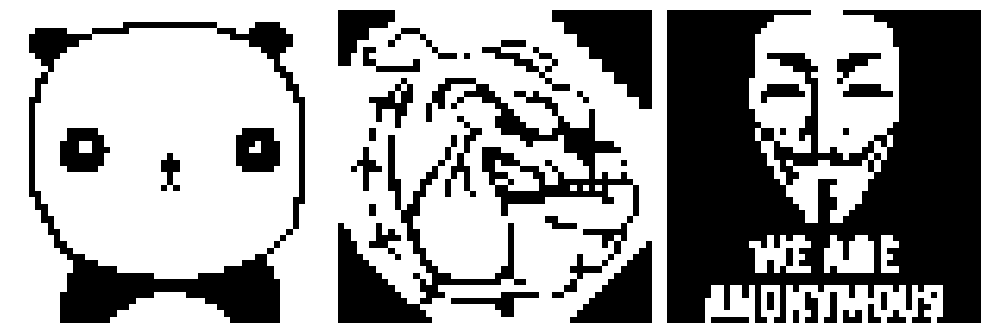

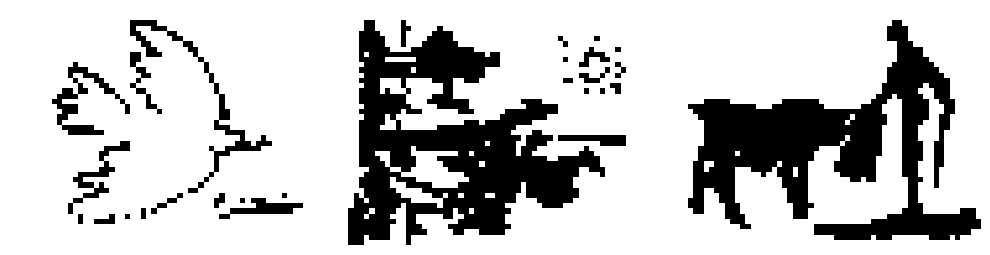

In [4]:
images_50x50 = load_images(path_50x50)
plot_images(images_50x50)

images_60x45 = load_images(path_60x45)
plot_images(images_60x45)

&ensp; Una vez cargadas las imágenes, se implementa la clase $\texttt{HopfieldNetwork}$, que permite entrenar patrones binarios y recuperar imágenes a partir de entradas parciales o ruidosas. La clase incluye los siguientes métodos principales:

- $\texttt{\_\_init\_\_}$: Inicializa los atributos de la red, incluyendo los pesos, la cantidad de neuronas y el número de iteraciones realizadas durante la predicción.

- $\texttt{\_preprocess\_patterns(patterns)}$: Convierte los patrones de entrada de valores binarios: $0$ y $1$, a valores centrados alrededor del cero: $-1$ y $1$. Esto es requerido por la red de Hopfield, ya que, esta funciona de manera más eficiente con valores simétricos.  
  
\begin{align*}
  S_i = 2 \cdot \text{pattern}_i - 1 \Longrightarrow 
  \begin{cases} 
  -1 & \text{si } \text{pattern}_i = 0  \\
  1 & \text{si } \text{pattern}_i = 1
  \end{cases}
\end{align*}

- $\texttt{train(patterns)}$: Entrena la red utilizando el aprendizaje Hebbiano propio de la red de Hopfield. En primer lugar, convierte los patrones a $-1$ y $1$ con el método $\texttt{\_preprocess\_patterns}$, luego calcula la matriz de pesos según:  

  $$ w_{ij} = \frac{1}{N} ~ \sum_{\mu=0}^{P} \xi_i^\mu \cdot \xi_j^\mu, \quad w_{ii} = 0$$

- $\texttt{predict(test\_pattern)}$: Dado un patrón de entrada (completo, parcial o con ruido), la red aplica la dinámica de actualización hasta converger a un estado estable:

  \begin{align*}
    S_i^{\text{current}} = \text{sgn}\left(\sum_{j = 0}^N w_{ij} \cdot S_j^{\text{previous}}\right)
  \end{align*}
  - Con actualización sincrónica (`synchronic=True`), todas las neuronas se actualizan al mismo tiempo.
  - Con actualización asincrónica (`synchronic=False`), se actualiza una neurona por vez en orden aleatorio hasta que ya no haya cambios.

- $\texttt{predict\_multiple(test\_patterns, size)}$: Aplica el método $\texttt{predict}$ a múltiples patrones de entrada (listas de *arrays*) y devuelve los resultados con la forma original de cada imagen.

In [5]:
class HopfieldNetwork:

    def __init__(self):
        self.weights = None
        self.n_neurons = None
        self.iterations = 0

    def _preprocess_patterns(self, patterns) -> np.ndarray:
        """
        Preprocesses the input patterns for the Hopfield network.
        """
        images_hopfield = [np.where(2 * patterns[i] - 1 >= 0, 1, -1) for i in range(len(patterns))]
        return np.array(images_hopfield)

    def train(self, patterns) -> None:
        """
        Trains the Hopfield network on a set of binary patterns (0/1).
        Converts them to -1/1 and updates the weights using Hebbian learning.
        """
        if patterns is None:
            raise ValueError("Input patterns cannot be None")

        if not isinstance(patterns, list):
            raise ValueError("Input patterns must be a list")

        hopfield_pattern = self._preprocess_patterns(patterns)
        n_patterns = hopfield_pattern.shape[0]
        
        neurons = hopfield_pattern.reshape(n_patterns, -1)
        self.n_neurons = neurons.shape[1]

        self.weights = (neurons.T @ neurons) / n_patterns
        np.fill_diagonal(self.weights, 0)

    def predict(self, test_pattern, synchronic) -> np.ndarray:
        """
        Predicts the output of the Hopfield network for a single input pattern.
        If synchronic is True, updates all neurons at once; otherwise, updates asynchronously.
        """
        if test_pattern is None:
            raise ValueError("Input pattern cannot be None")

        if not isinstance(test_pattern, (np.ndarray, list)):
            raise ValueError("Input pattern must be a numpy array or a list")
        
        hopfield_test_pattern = self._preprocess_patterns(test_pattern)
        current_neurons = hopfield_test_pattern.reshape(-1)

        if synchronic:
            current_neurons = np.where(self.weights @ current_neurons.T >= 0, 1, -1)
                
        else:
            new_neurons = np.zeros_like(current_neurons)
            self.iterations = 0

            while True:
                changes = 0
                for i in np.random.permutation(self.n_neurons):
                    new_neurons = current_neurons
                    new_neurons[i] = np.where(self.weights[i] @ new_neurons.T >= 0, 1, -1)
                    if new_neurons[i] != current_neurons[i]:
                        current_neurons = new_neurons
                        changes += 1
                    
                if changes == 0:
                    break

                self.iterations += 1

        return current_neurons

    def predict_multiple(self, test_patterns, size, synchronic=False) -> list[np.ndarray]:
        """
        Predicts the output of the Hopfield network for multiple input patterns of a given size.
        """
        if test_patterns is None:
            raise ValueError("Input patterns cannot be None")

        if not isinstance(test_patterns, list):
            raise ValueError("Input patterns must be a list")

        predictions = []
        for pattern in test_patterns:
            prediction = self.predict(pattern, synchronic)
            predictions.append(prediction.reshape(size))
        
        return predictions

&ensp; La implementación de est clase resulta útil porque organiza de manera modular todas las funciones necesarias para entrenar y probar una red de Hopfield. Al encapsular el preprocesamiento, el cálculo de pesos y las reglas de actualización en métodos independientes, el código se vuelve más legible, fácil de mantener y reutilizable.

**(A). Verifique si la red aprendió las imágenes enseñadas.**

&ensp; En una primera instancia, se definió la función $\texttt{calculate\_accuracy}$, que compara el porcentaje de coincidencia píxel por píxel de la imagen original con la imagen predicha por la red. De esta forma, el resultado obtenido es una métrica de *accuracy* que indica qué tan fielmente se recuerda cada imagen.

In [6]:
def calculate_accuracy(original, predicted) -> list[float]:
    """
    Calculates the accuracy of the Hopfield network's predictions.
    """
    if original is None or predicted is None:
        raise ValueError("Input patterns cannot be None")

    if not isinstance(original, list) or not isinstance(predicted, list):
        raise ValueError("Input patterns must be lists")

    n_original = len(original)
    if n_original != len(predicted):
        raise ValueError("Input patterns must have the same length")

    original = [np.where(2 * original[i] - 1 >= 0, 1, -1) for i in range(n_original)] # Convert to -1 & 1

    accuracy = []
    for i in range(n_original):
        if original[i].shape != predicted[i].shape:
            raise ValueError("All patterns must have the same shape")

        accuracy.append(np.mean(original[i] == predicted[i]))

    return accuracy


&ensp; Posteriormente, se iniciaron dos redes de Hopfield entrenadas con las imágenes de distintas dimensiones, así se utilizó el método $\texttt{predict\_multiple}$ para intentar recuperarlas. Los resultados se visualizan mediante $\texttt{plot\_images}$, lo que permite observar de manera directa si las imágenes originales fueron correctamente memorizadas.

&ensp; Por último, se utilizó la función $\texttt{calculate\_accuracy}$ sobre cada conjunto de imágenes. Esto permite obtener un valor numérico de exactitud para cada caso, mostrado en formato porcentual junto al índice de la imagen. Así, no solo se cuenta con una verificación visual, sino también con una medida cuantitativa que confirma si la red efectivamente aprendió los patrones presentados.

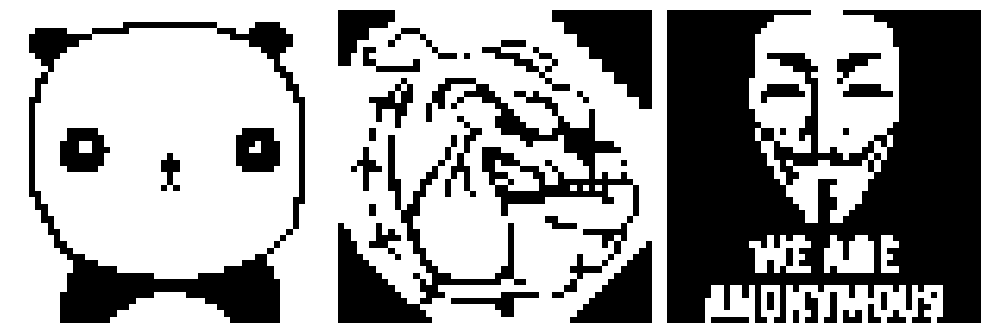

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [7]:
HN_50x50 = HopfieldNetwork()
HN_50x50.train(images_50x50)
predicted_50x50 = HN_50x50.predict_multiple(images_50x50, (50, 50))

plot_images(predicted_50x50)

accuracies_50x50 = calculate_accuracy(images_50x50, predicted_50x50)
for i, acc in enumerate(accuracies_50x50):
    display(Latex(rf"$\text{{Imagen}} ~ {i+1}: \quad \textbf{{Accuracy}} = {acc:.0%}$%"))

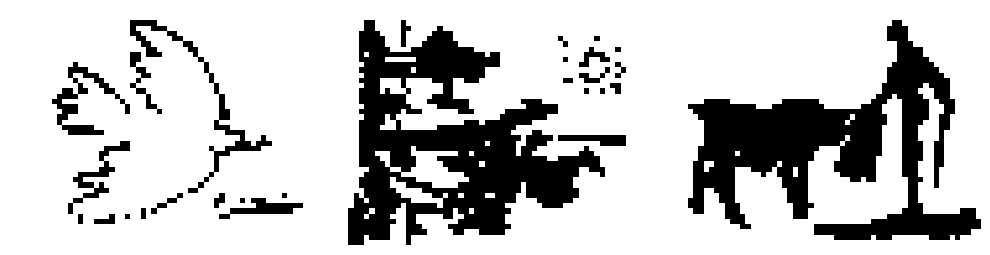

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
HN_60x45 = HopfieldNetwork()
HN_60x45.train(images_60x45)
predicted_60x45 = HN_60x45.predict_multiple(images_60x45, (45, 60)) #60x45 means 45 rows & 60 columns

plot_images(predicted_60x45)

accuracies_60x45 = calculate_accuracy(images_60x45, predicted_60x45)
for i, acc in enumerate(accuracies_60x45):
    display(Latex(rf"$\text{{Imagen}} ~ {i+1}: \quad \textbf{{Accuracy}} = {acc:.0%}$%"))

&ensp; Como resultado del entrenamiento y la evaluación, se observa que la red logra recuperar todas las imágenes enseñadas de manera perfecta, alcanzando en cada caso un $ 100 \%$ de *accuracy*. Esto confirma que los patrones fueron almacenados de forma estable y que, al presentarlos nuevamente, se reproducen sin errores.

**(B). Evalúe la evolución de la red al presentarle versiones alteradas de las imágenes aprendidas: agregado de ruido, elementos borrados o agregados.**

In [9]:
def generate_noise(images, noise_level) -> list[np.ndarray]:
    """
    Generates random noise to add to the images.
    """
    noisy_images = []
    for img in images:
        noise = np.random.binomial(1, 1 - noise_level, img.shape)
        noisy_images.append(img * noise)
    
    return noisy_images

In [10]:
def erase_images(images, erase_percentage) -> list[np.ndarray]:
    """
    Erases a square block of pixels from each image according to the given erase percentage.
    """
    erased_images = []
    
    for img in images:
        m, n = img.shape
        block_size = int(np.sqrt(erase_percentage * m * n))

        block_size = min(block_size, m, n) # Block size should not exceed image dimensions
        max_x = m - block_size
        max_y = n - block_size

        start_x = np.random.randint(0, max_x + 1)
        start_y = np.random.randint(0, max_y + 1)
        
        img = img.astype(float)
        img[start_x:start_x + block_size, start_y:start_y + block_size] = 0.5

        erased_images.append(img)
    
    return erased_images

In [11]:
def plot_accuracy_variation(model, original, noise_bool, noise_levels, size) -> None:
    """
    Plots the accuracy variation of the model for different noise/erasure/spurious levels.
    """
    accuracies = []
    for noise in noise_levels:
        if noise_bool:
            noisy_images = generate_noise(original, noise)
        else:
            noisy_images = erase_images(original, noise)
        
        predictions = model.predict_multiple(noisy_images, size)
        accuracy = calculate_accuracy(original, predictions)
        accuracies.append(accuracy)

    legends = [f'Imagen {i+1}' for i in range(len(original))]
    plt.plot(noise_levels, accuracies, label=legends)
    if noise_bool:
        plt.title('Model Accuracy Variation with Noise Level')
        plt.xlabel('Noise Level')
    else:
        plt.title('Model Accuracy Variation with Erasure Level')
        plt.xlabel('Erasure Level')
        
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()

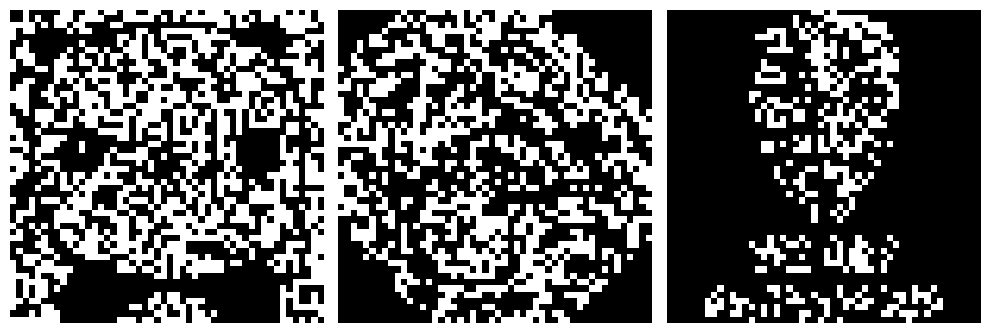

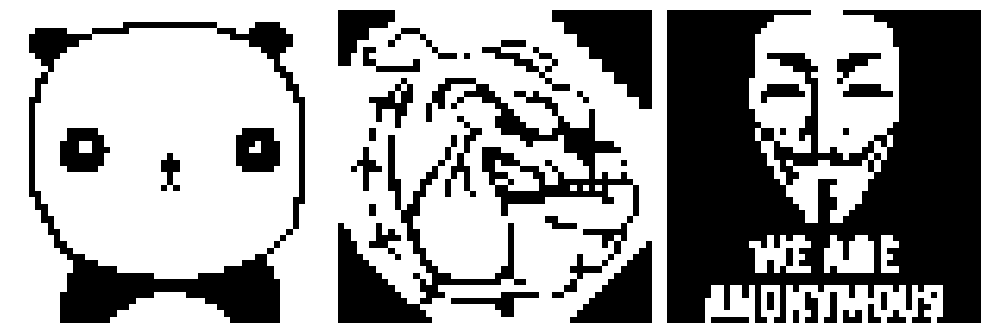

In [12]:
images_50x50_noisy = generate_noise(images_50x50, noise_level=0.45)
plot_images(images_50x50_noisy)

predicted_50x50_noisy = HN_50x50.predict_multiple(images_50x50_noisy, (50, 50))
plot_images(predicted_50x50_noisy)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

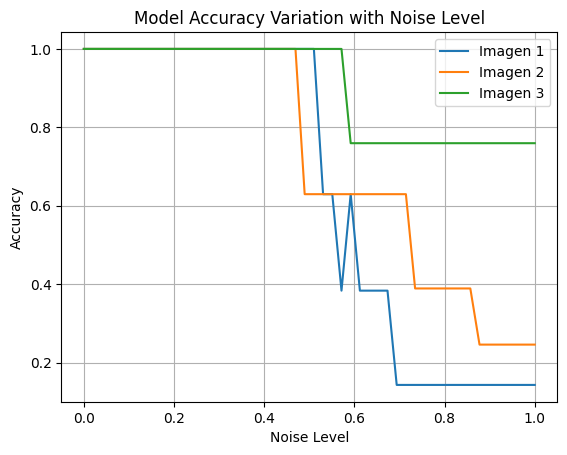

In [13]:
accuracies_50x50_noisy = calculate_accuracy(images_50x50, predicted_50x50_noisy)
for i, acc in enumerate(accuracies_50x50_noisy):
    display(Latex(rf"$\text{{Imagen}} ~ {i+1}: \quad \textbf{{Accuracy}} = {acc:.0%}$%"))

noise_levels = np.linspace(0, 1, 50)
plot_accuracy_variation(HN_50x50, images_50x50, noise_bool=True, noise_levels=noise_levels, size=(50, 50))

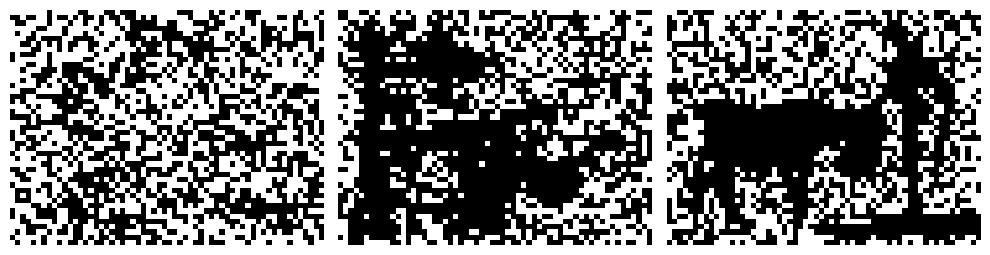

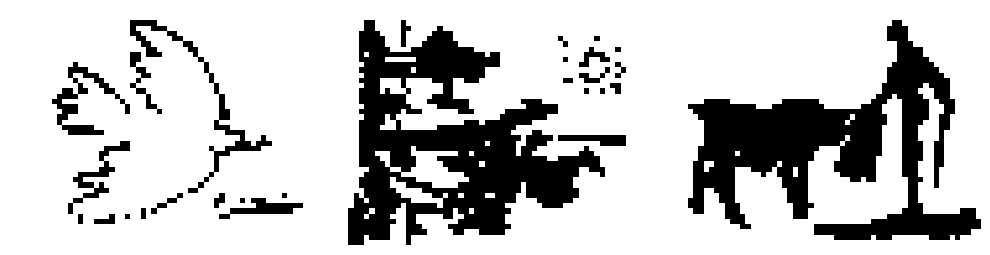

In [14]:
images_60x45_noisy = generate_noise(images_60x45, noise_level=0.45)
plot_images(images_60x45_noisy)

predicted_60x45_noisy = HN_60x45.predict_multiple(images_60x45_noisy, (45, 60))
plot_images(predicted_60x45_noisy)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

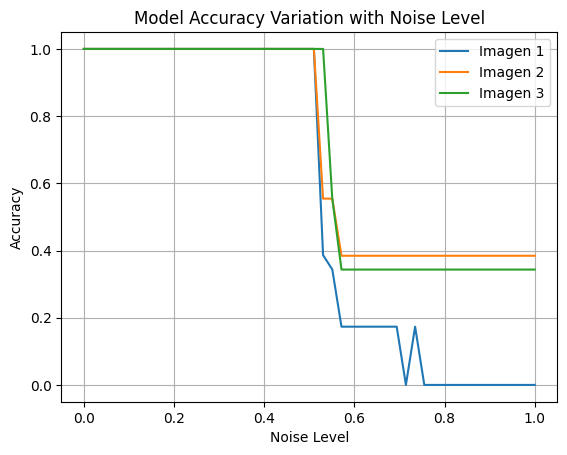

In [15]:
accuracies_60x45_noisy = calculate_accuracy(images_60x45, predicted_60x45_noisy)
for i, acc in enumerate(accuracies_60x45_noisy):
    display(Latex(rf"$\text{{Imagen}} ~ {i+1}: \quad \textbf{{Accuracy}} = {acc:.0%}$%"))

plot_accuracy_variation(HN_60x45, images_60x45, noise_bool=True, noise_levels=noise_levels, size=(45, 60))

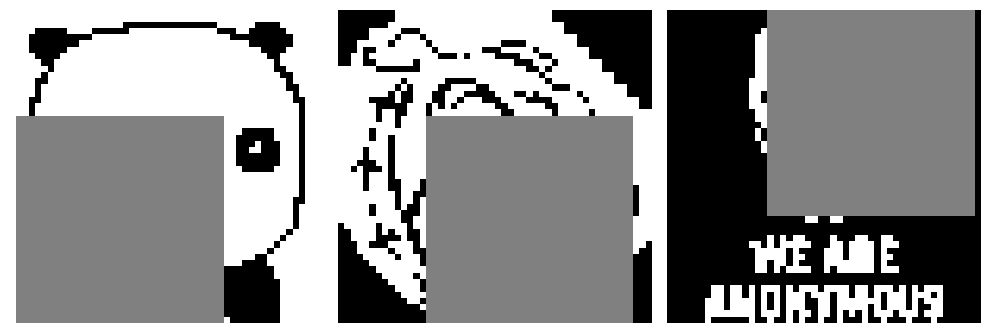

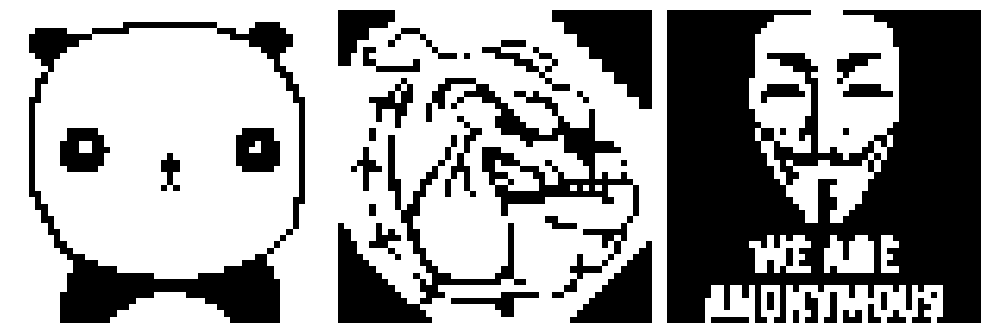

In [16]:
images_50x50_erased = erase_images(images_50x50, erase_percentage=0.45)
plot_images(images_50x50_erased)

predicted_50x50_erased = HN_50x50.predict_multiple(images_50x50_erased, (50, 50))
plot_images(predicted_50x50_erased)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

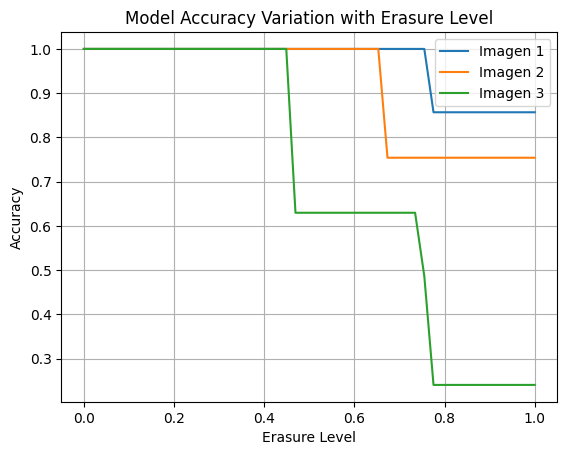

In [17]:
accuracies_50x50_erased = calculate_accuracy(images_50x50, predicted_50x50_erased)
for i, acc in enumerate(accuracies_50x50_erased):
    display(Latex(rf"$\text{{Imagen}} ~ {i+1}: \quad \textbf{{Accuracy}} = {acc:.0%}$%"))

plot_accuracy_variation(HN_50x50, images_50x50, noise_bool=False, noise_levels=noise_levels, size=(50, 50))

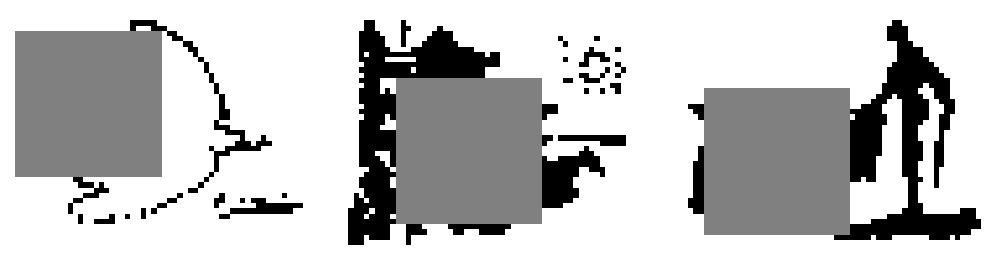

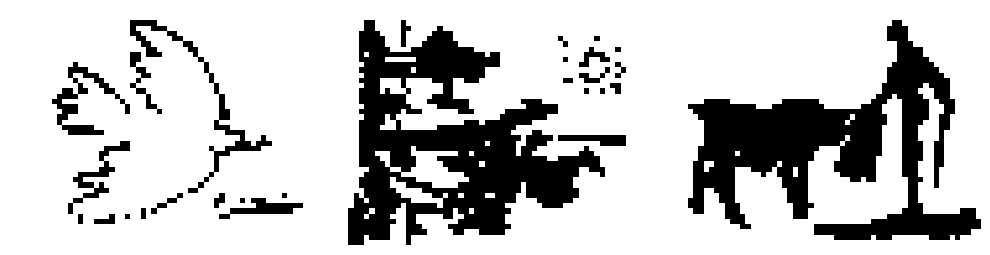

In [18]:
images_60x45_erased = erase_images(images_60x45, erase_percentage=0.3)
plot_images(images_60x45_erased)

predicted_60x45_erased = HN_60x45.predict_multiple(images_60x45_erased, (45, 60))
plot_images(predicted_60x45_erased)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

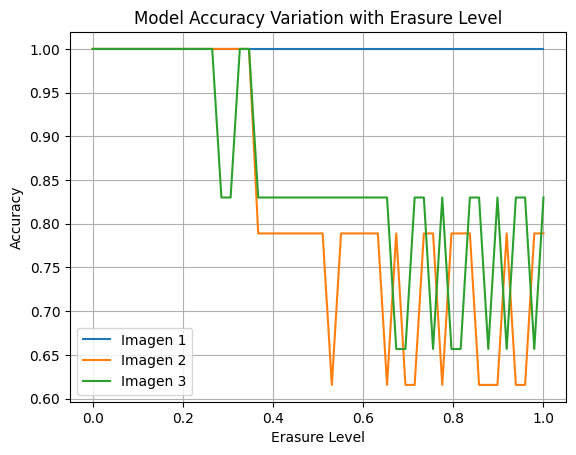

In [19]:
accuracies_60x45_erased = calculate_accuracy(images_60x45, predicted_60x45_erased)
for i, acc in enumerate(accuracies_60x45_erased):
    display(Latex(rf"$\text{{Imagen}} ~ {i+1}: \quad \textbf{{Accuracy}} = {acc:.0%}$%"))

plot_accuracy_variation(HN_60x45, images_60x45, noise_bool=False, noise_levels=noise_levels, size=(45, 60))

**(C). Evalúe la existencia de estados espurios en la red: patrones inversos y combinaciones de un número impar de patrones.** 

In [20]:
def generate_inverse_spurious_states(patterns) -> list[np.ndarray]:
    """
    Generates inverse spurious states for a set of patterns.
    """
    if patterns is None:
        raise ValueError("Input patterns cannot be None")

    if not isinstance(patterns, list):
        raise ValueError("Input patterns must be a list")

    hoppfield_inverse_pattern = [np.where(2 * patterns[i] - 1 >= 0, -1, 1) for i in range(len(patterns))]
    return hoppfield_inverse_pattern


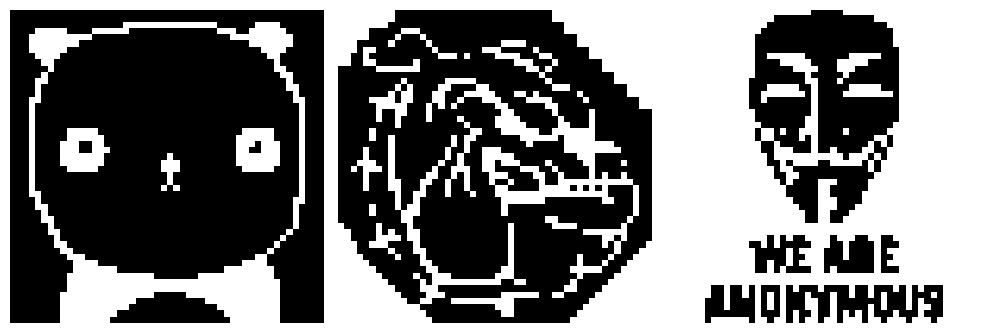

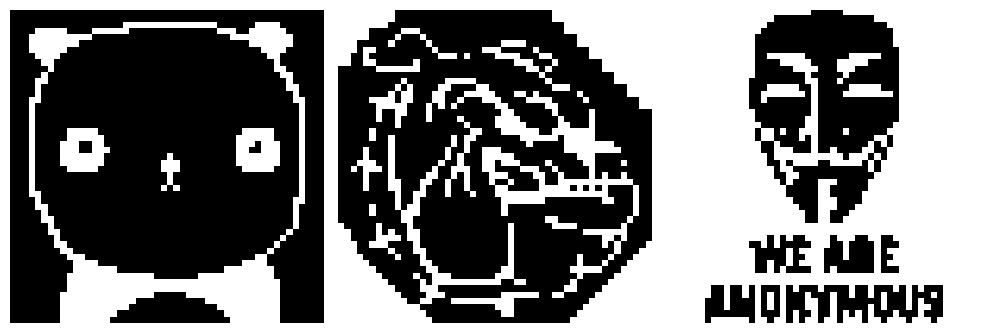

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [21]:
inverse_images_50x50 = generate_inverse_spurious_states(images_50x50)
plot_images(inverse_images_50x50)

predicted_50x50_inverse = HN_50x50.predict_multiple(inverse_images_50x50, (50, 50))
plot_images(predicted_50x50_inverse)

accuracies_50x50_inverse = calculate_accuracy(inverse_images_50x50, predicted_50x50_inverse)
for i, acc in enumerate(accuracies_50x50_inverse):
    display(Latex(rf"$\text{{Imagen}} ~ {i+1}: \quad \textbf{{Accuracy}} = {acc:.0%}$%"))

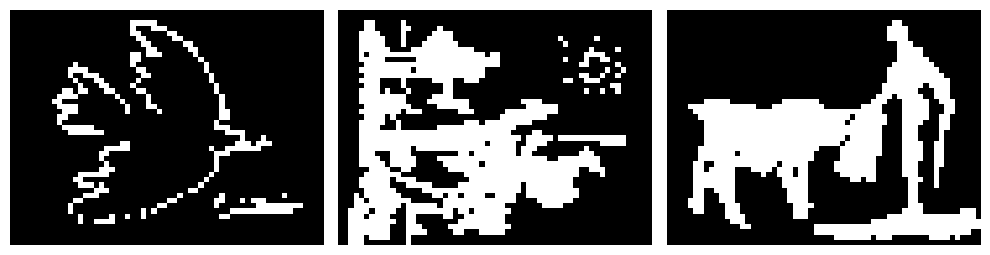

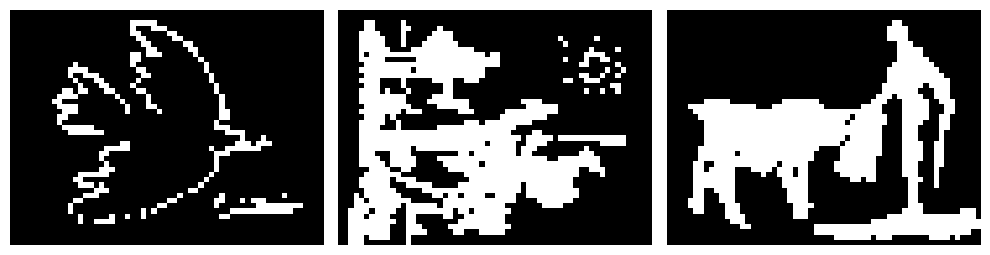

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [22]:
inverse_images_60x45 = generate_inverse_spurious_states(images_60x45)
plot_images(inverse_images_60x45)

predicted_60x45_inverse = HN_60x45.predict_multiple(inverse_images_60x45, (45, 60))
plot_images(predicted_60x45_inverse)

accuracies_60x45_inverse = calculate_accuracy(inverse_images_60x45, predicted_60x45_inverse)
for i, acc in enumerate(accuracies_60x45_inverse):
    display(Latex(rf"$\text{{Imagen}} ~ {i+1}: \quad \textbf{{Accuracy}} = {acc:.0%}$%"))

In [23]:
def combination_spurious_states(patterns, n_comb) -> list[np.ndarray]:
    """
    Generates a spurious state by combining n_comb random patterns (n_comb must be odd).
    Returns a list with a single combined pattern (for plotting compatibility).
    """
    if patterns is None:
        raise ValueError("Input patterns cannot be None")

    if not isinstance(patterns, list):
        raise ValueError("Input patterns must be a list")

    if n_comb % 2 == 0:
        raise ValueError("n_comb must be an odd number")
    n_patterns = len(patterns)

    replace = n_patterns < n_comb # If n_patterns < n_comb, allow replacement
    index = np.random.choice(n_patterns, n_comb, replace=replace)
    
    hopfield_patterns = [np.where(2 * patterns[i] - 1 >= 0, 1, -1) for i in index]
    combined = np.sum(hopfield_patterns, axis=0)
    combined = np.where(combined >= 0, 1, -1)
    
    return [combined]

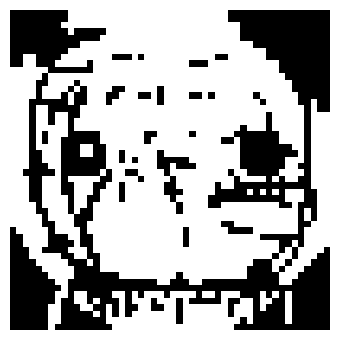

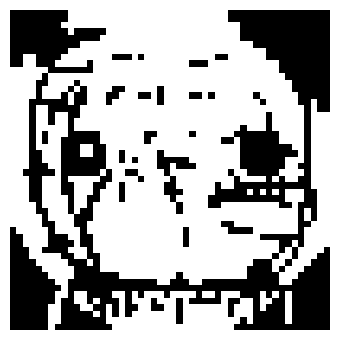

<IPython.core.display.Latex object>

In [24]:
combinated_images_50x50 = combination_spurious_states(images_50x50, 3)
plot_images(combinated_images_50x50)

predicted_50x50_combinated = HN_50x50.predict_multiple(combinated_images_50x50, (50, 50))
plot_images(predicted_50x50_combinated)

accuracies_50x50_combinated = calculate_accuracy(combinated_images_50x50, predicted_50x50_combinated)
display(Latex(rf"$\text{{Imagen}}: \quad \textbf{{Accuracy}} = {acc:.0%}$%"))

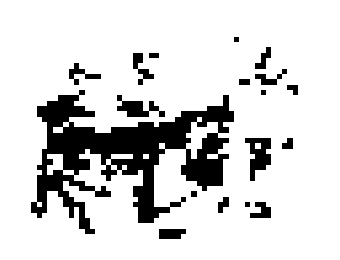

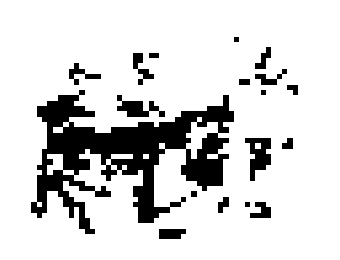

<IPython.core.display.Latex object>

In [25]:
combinated_images_60x45 = combination_spurious_states(images_60x45, 3)
plot_images(combinated_images_60x45)

predicted_60x45_combinated = HN_60x45.predict_multiple(combinated_images_60x45, (45, 60))
plot_images(predicted_60x45_combinated)

accuracies_60x45_combinated = calculate_accuracy(combinated_images_60x45, predicted_60x45_combinated)
display(Latex(rf"$\text{{Imagen}}: \quad \textbf{{Accuracy}} = {acc:.0%}$%"))

**(D). Realice un entrenamiento con las 6 imágenes disponibles. ¿Es capaz la red de aprender todas las imágenes? Explique.**

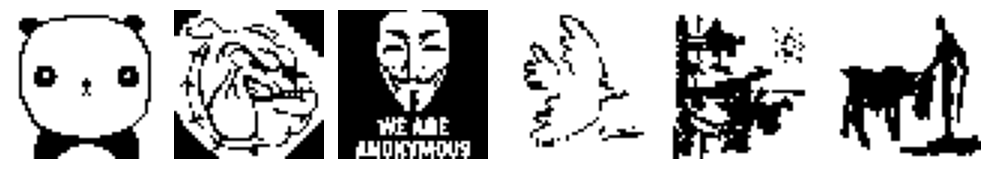

In [26]:
images_60x45_resized = load_images(path_60x45, resize=(50, 50))
all_images = images_50x50 + images_60x45_resized

plot_images(all_images)

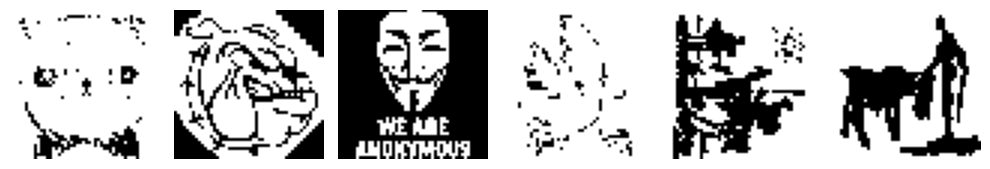

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [27]:
HN_all = HopfieldNetwork()
HN_all.train(all_images)
predicted_all = HN_all.predict_multiple(all_images, (50, 50))

plot_images(predicted_all)

accuracies_all = calculate_accuracy(all_images, predicted_all)
for i, acc in enumerate(accuracies_all):
    display(Latex(rf"$\text{{Imagen}} ~ {i+1}: \quad \textbf{{Accuracy}} = {acc:.0%}$%"))

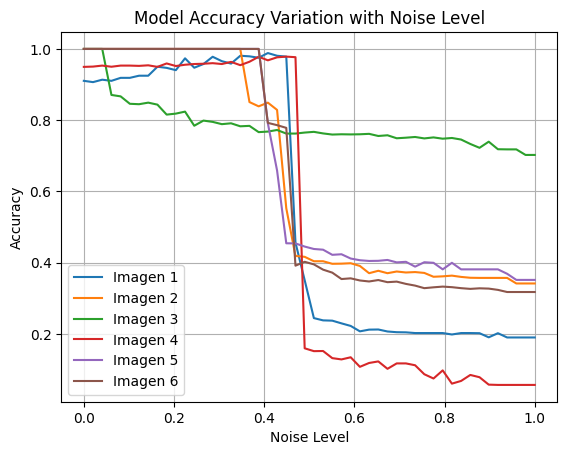

In [28]:
plot_accuracy_variation(HN_all, all_images, noise_bool=True, noise_levels=noise_levels, size=(50, 50))

<div style="text-align: left;">
  <h4><b>Ejercicio 2</b></h4>
</div>

**(A). Comprobar estadísticamente la capacidad de la red de Hopfield ‘82 calculando la cantidad máxima de patrones pseudo-aleatorios aprendidos en función del tamaño de la red. Obtener experimentalmente los resultados de la siguiente tabla (los valores de la tabla corresponden a una iteración con actualización sincrónica).**

<center>

| $P_{\text{error}}$ | $\frac{p_{\text{max}}}{N}$ |
|--------|--------|
| 0,001  | 0,105  |
| 0,0036 | 0,138  |
| 0,01   | 0,185  |
| 0,05   | 0,37   |
| 0,1    | 0,61   |

(*Tabla $2.1$, sección $2.2$, Hertz, Krogh & Palmer, pág. $19$*)

</center>

In [29]:
def generate_independent_patterns(n_original, pattern_shape) -> list[np.ndarray]:
    """
    Generates independent n_original random binary patterns of a given shape.
    """
    patterns = []
    i = 0
    while i < n_original:
        pattern = np.random.randint(0, 2, size=pattern_shape)
        if not any(np.array_equal(pattern, p) for p in patterns):
            patterns.append(pattern)
            i += 1
    return patterns

def generate_correlated_patterns(n_original, pattern_shape, rho) -> list[np.ndarray]:
    """
    Generates correlated n_original random binary patterns of a given shape.
    """
    q = (1.0 + np.sqrt(rho)) / 2.0
    p_flip = 1.0 - q 
    base_pattern = np.random.randint(0, 2, size=pattern_shape)
    
    patterns = []
    i = 0
    while i < n_original:
        mask = np.random.rand(*pattern_shape) < p_flip
        new_pattern = base_pattern.copy()
        new_pattern[mask] = 1 - new_pattern[mask]
        if not any(np.array_equal(new_pattern, p) for p in patterns):
            patterns.append(new_pattern)
            i += 1

    return patterns

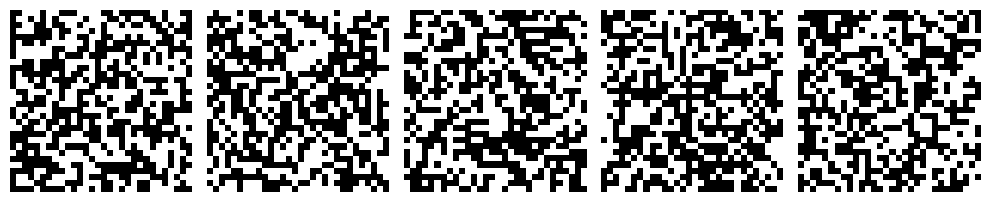

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [30]:
independent_patterns = generate_independent_patterns(5, (30, 30))
plot_images(independent_patterns)

for i in range(len(independent_patterns)-1):
     for j in range(i+1, len(independent_patterns)):
        corr_coef = np.corrcoef(independent_patterns[i].flatten(), independent_patterns[j].flatten())[0, 1]
        display(Latex(rf"$\text{{Correlation between pattern {i+1} and pattern {j+1}}}: \quad \rho \approx {corr_coef:.2f}$"))

In [46]:
def calculate_error(original_patterns, predicted_patterns) -> float:
    """
    Calculates the error between the original and predicted patterns.
    """
    if original_patterns is None or predicted_patterns is None:
        raise ValueError("Input patterns cannot be None")

    if not isinstance(original_patterns, list) or not isinstance(predicted_patterns, list):
        raise ValueError("Input patterns must be lists")

    n_original = len(original_patterns)
    if n_original != len(predicted_patterns):
        raise ValueError("Original and predicted patterns must have the same length")

    original = [np.where(2 * original_patterns[i] - 1 >= 0, 1, -1) for i in range(n_original)] # Convert to -1 & 1
    mean_errors = []
    for i in range(n_original):
        if original[i].shape != predicted_patterns[i].shape:
            raise ValueError("All patterns must have the same shape")

        mean_errors.append(np.mean(original[i] != predicted_patterns[i]))

    return np.mean(mean_errors)

def get_parameters(n_patterns, size, proba_error, independence, rho) -> tuple[float, int]:
    """
    Generates patterns (independent or correlated) and calculates the capacity and maximum patterns
    """
    if proba_error is None:
        raise ValueError("proba_error cannot be None")

    if n_patterns is None:
        raise ValueError("n_patterns cannot be None")

    max_patterns = 0
    for n in n_patterns:
        patterns = (generate_independent_patterns(n, size) if independence else generate_correlated_patterns(n, size, rho))

        HN = HopfieldNetwork()
        HN.train(patterns)
        predicted = HN.predict_multiple(patterns, size, synchronic=True)
        
        error = calculate_error(patterns, predicted)
        if error > proba_error:
            break
        else:
            max_patterns = n

    return (max_patterns / np.prod(size), max_patterns)

def get_multiple_parameters(size, probas_error, independence=True, rhos=None) -> list[tuple[float, int]]:
    """
    Generates patterns (independent or correlated) and calculates the capacity and maximum patterns for
    each error probability or correlation strength.
    """
    if probas_error is None:
        raise ValueError("probas_error cannot be None")

    if not isinstance(probas_error, list):
        raise ValueError("probas_error must be a list")

    results = []
    
    if independence:
        previous_max_pattern = 1
        for proba in probas_error:
            n_patterns = np.linspace(previous_max_pattern, previous_max_pattern + 200, 50, dtype=int)
            aux = get_parameters(n_patterns, size, proba, independence=True, rho=None)
            results.append(aux)
            previous_max_pattern = aux[1]

    else:
        for rho in rhos:
            for proba in probas_error:
                n_patterns = np.linspace(1, 150, 50, dtype=int)
                aux = get_parameters(n_patterns, size, proba, independence, rho)
                results.append(aux)

    return results

In [47]:
sizes = [(10, 10), (20, 20), (30, 30), (40, 40)]
probas_error = [0.001, 0.0036, 0.01, 0.05, 0.1]
results = []

for size in sizes:
    display(Latex(rf"$------ \textbf{{Tamaño de la red}}: {size[0]} \times {size[1]} ------$"))
    aux = get_multiple_parameters(size, probas_error)
    results.append(aux)

    for i, (capacity, max_patterns) in enumerate(aux):
        display(Latex(rf"$p_{{\text{{error}}}} = {probas_error[i]} \quad \Longrightarrow \quad C \approx {capacity:.2f}, ~~ \textbf{{Max Patterns}} = {max_patterns}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [33]:
def plot_capacities(theory, practical, probas, size) -> None:
    """
    Plots the theoretical and practical capacities of the Hopfield network against error probabilities.
    """
    if theory is None or practical is None or probas is None:
        raise ValueError("Theoretical and practical capacities cannot be None")

    if not isinstance(theory, list) or not isinstance(practical, list) or not isinstance(probas, list):
        raise ValueError("Capacities must be lists")

    if len(theory) != len(practical) or len(theory) != len(probas):
        raise ValueError("Theory, practical, and probas lists must have the same length")

    x = np.arange(len(probas))  
    width = 0.35 

    plt.figure(figsize=(8, 6))
    plt.bar(x - width/2, theory, width, label='Theoretical', edgecolor='k', zorder=3)
    plt.bar(x + width/2, practical, width, label='Practical', edgecolor='k', zorder=3)

    plt.title(f'Hopfield Network Capacities (N = {size[0]} x {size[1]})')
    plt.xlabel('Error Probability')
    plt.ylabel('Capacity')
    plt.xticks(x, probas)
    plt.grid(zorder=0)
    plt.legend()
    plt.show()

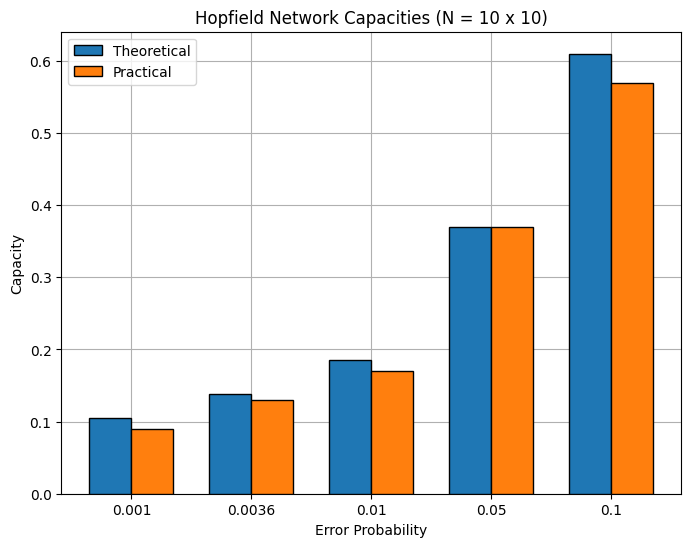

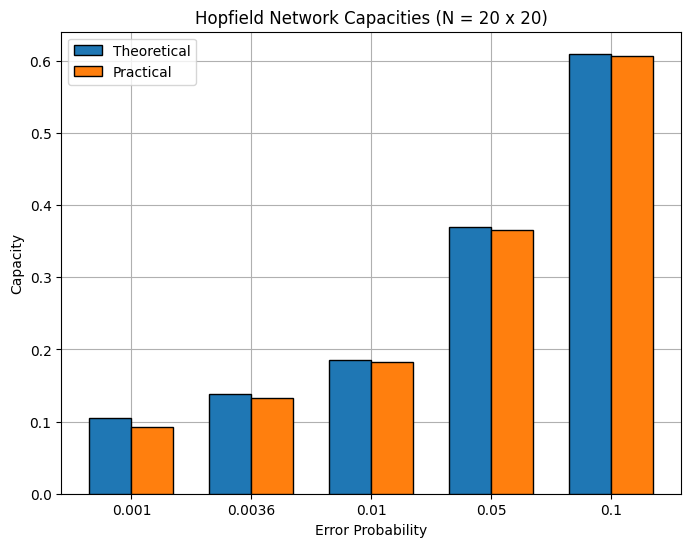

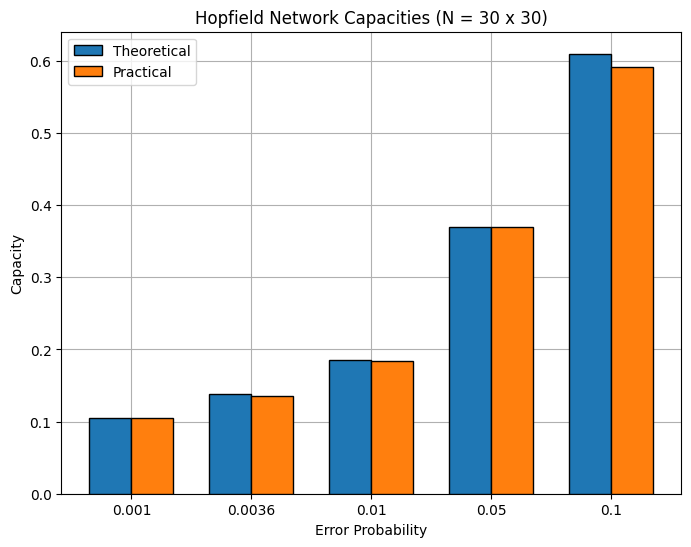

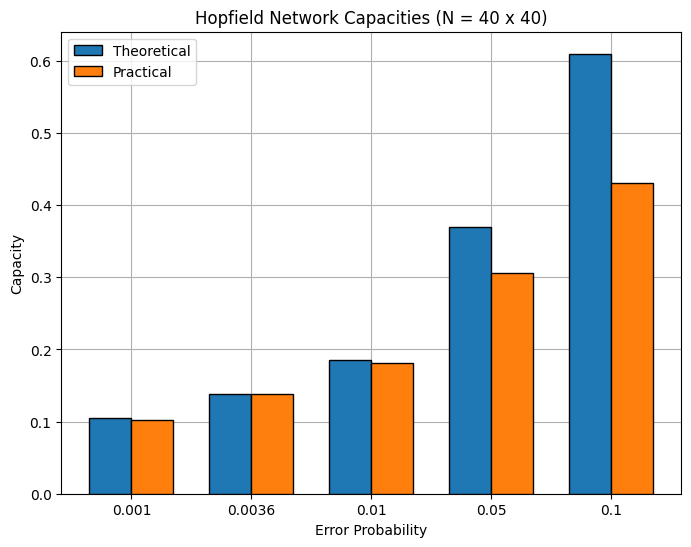

In [48]:
theo_capacity = [0.105, 0.138, 0.185, 0.37, 0.61]
for i, size in enumerate(sizes):
    practical_capacity = [r[0] for r in results[i]]
    plot_capacities(theo_capacity, practical_capacity, probas_error, size)

**(B).** Proponer una manera de generar patrones con distintos grados de correlación. Utilice el método propuesto para analizar cómo varía la capacidad de la red de Hopfield en función de la correlación entre patrones.

In [35]:
def plot_capacities_vs_correlation(sizes, rhos, proba, theoretical) -> None:
    """
    Plots the capacities of the Hopfield network against correlation strengths.
    """
    if rhos is None or proba is None:
        raise ValueError("Rhos and probabilities cannot be None")

    if not isinstance(rhos, list):
        raise ValueError("Rhos must be a list")

    plt.figure(figsize=(8, 6))
    
    for size in sizes:
        corr_results = get_multiple_parameters(size, [proba], independence=False, rhos=rhos)
        corr_capacities = [r[0] for r in corr_results]
        plt.plot(rhos, corr_capacities, marker='o', linestyle='-', label=f'$N={size[0]}x{size[1]}$', zorder=3)
    
    plt.axhline(y=theoretical, color='k', linestyle='--', alpha=0.5, label='Theoretical', zorder=3)

    plt.title(f'Hopfield Network Capacities vs Correlation Strength (p={proba})')
    plt.xlabel('Correlation Strength')
    plt.ylabel('Capacity')
    plt.grid(zorder=0)
    plt.legend()
    plt.show()

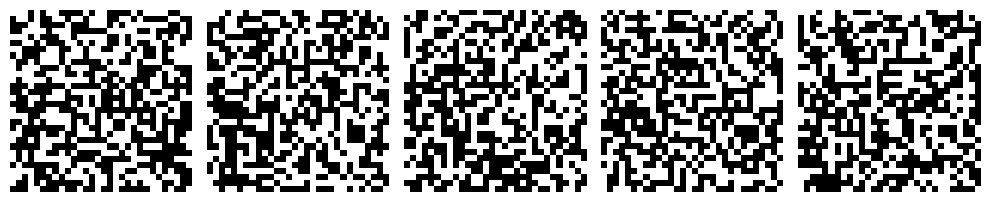

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
correlated_patterns = generate_correlated_patterns(5, (30, 30), 0.35)
plot_images(correlated_patterns)

for i in range(len(correlated_patterns)-1):
    for j in range(i+1, len(correlated_patterns)):
        corr_coef = np.corrcoef(correlated_patterns[i].flatten(), correlated_patterns[j].flatten())[0, 1]
        display(Latex(rf"$\text{{Correlation between pattern {i+1} and pattern {j+1}}}: \quad \rho \approx {corr_coef:.2f}$"))

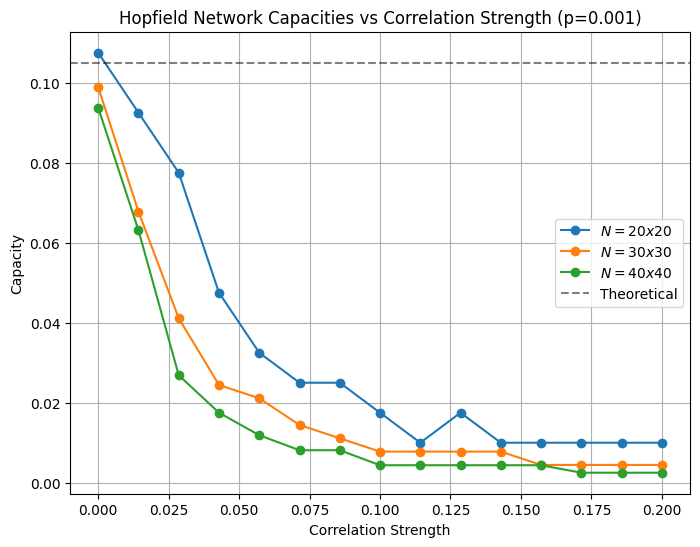

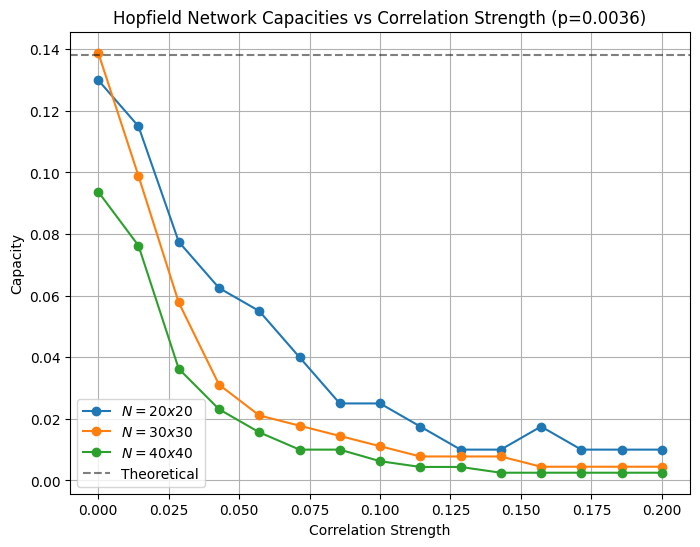

In [42]:
rhos_correlate = np.linspace(0, 0.2, 15)

for i in range(2):
    plot_capacities_vs_correlation(sizes[1::], list(rhos_correlate), probas_error[i], theo_capacity[i])